In [1]:
import ipyparallel
import hddm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(hddm.__version__)

0.8.0


/home/jasongong/anaconda3/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data = hddm.load_csv('/home/jasongong/OneDrive/projects/mood_management/data/pilot2hddm.csv')
data.head(10)

,subj_idx,stim,rt,response
0,0,0V0A,4.642965,1
1,0,0V0A,2.070100,1
2,0,0V0A,1.743915,0
3,0,0V0A,6.519295,1
4,0,0V0A,5.127105,1
5,0,0V0A,1.631085,0
6,0,0V0A,14.392305,1
7,0,0V0A,0.389210,0
8,0,0V0A,1.074315,0
9,0,0V0A,2.412985,0


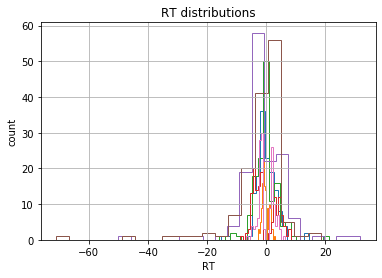

In [3]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

plt.savefig('hddm_demo_fig_00.pdf')

In [4]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m.sample(2000, burn=20)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 63.4 sec

In [5]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1', 'a_subj.2', 'a_subj.3', 'a_subj.4',
                       'a_subj.5', 'a_subj.6', 'v', 'v_std', 'v_subj.0', 'v_subj.1',
                       'v_subj.2', 'v_subj.3', 'v_subj.4', 'v_subj.5', 'v_subj.6'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.81349,0.297947,2.21272,2.63494,2.81006,2.98104,3.4361,0.00671316
a_std,0.811753,0.291408,0.428741,0.608544,0.752899,0.937886,1.55197,0.0097471
a_subj.0,2.87233,0.101763,2.67703,2.80692,2.86976,2.93528,3.08044,0.00259585
a_subj.1,1.98687,0.0894575,1.82433,1.92487,1.98442,2.04618,2.16731,0.00300174
a_subj.2,2.61396,0.0955551,2.42603,2.54931,2.61546,2.67802,2.79883,0.00247422
a_subj.3,3.32745,0.145619,3.0504,3.23003,3.31924,3.41973,3.63618,0.00440798
a_subj.4,3.66827,0.176035,3.32077,3.54706,3.6693,3.78869,4.00913,0.00549478
a_subj.5,3.5349,0.175029,3.18959,3.41858,3.53712,3.65262,3.88109,0.00682655
a_subj.6,2.21728,0.102802,2.02949,2.14695,2.20875,2.28365,2.43282,0.00318603
v,-0.133639,0.04791,-0.229678,-0.159849,-0.132359,-0.10605,-0.0360577,0.00167826


Plotting a
Plotting a_std
Plotting v
Plotting t


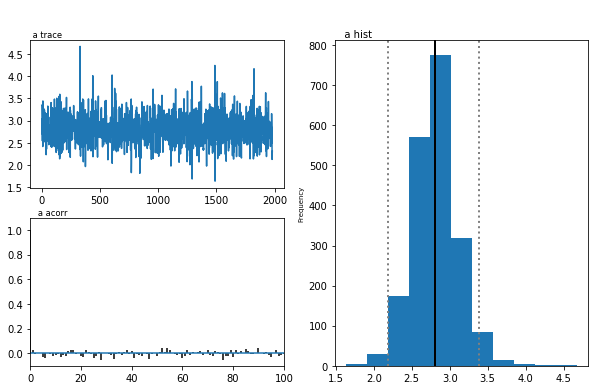

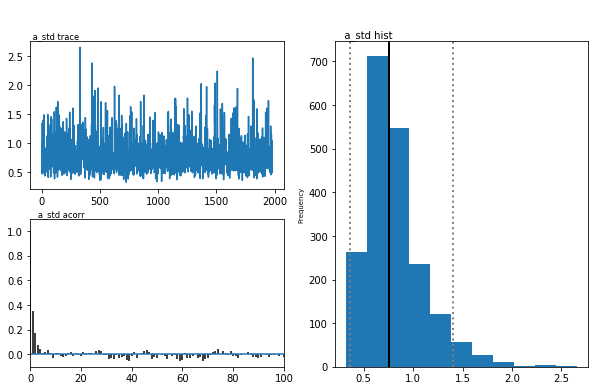

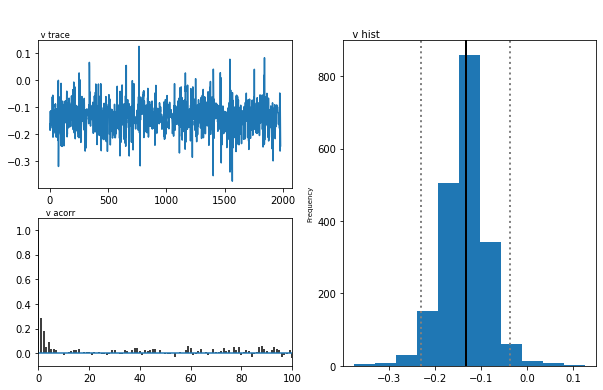

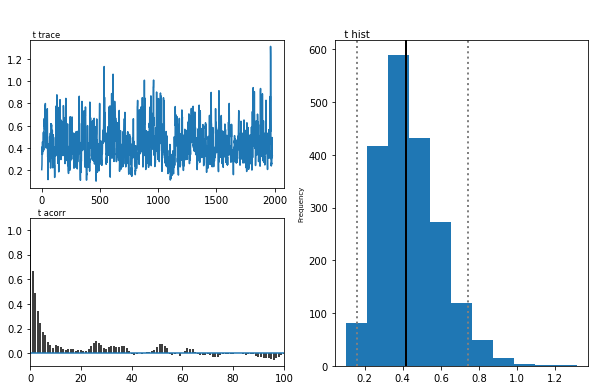

In [6]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

In [7]:
models = []
for i in range(5):
    m = hddm.HDDM(data, p_outlier=.05)
    m.find_starting_values()
    m.sample(5000, burn=20)
    models.append(m)

hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 5000 of 5000 complete in 157.0 sec

{'a': 0.9999287048555279,
 'a_std': 1.0001291439897966,
 'a_subj.0': 0.9999555627233535,
 'a_subj.1': 1.0001395744291317,
 'a_subj.2': 1.0001090131875077,
 'a_subj.3': 1.0000335878344415,
 'a_subj.4': 0.9999923976772999,
 'a_subj.5': 1.0002892369502603,
 'a_subj.6': 1.0003224596469407,
 'v': 0.9999628804179265,
 'v_std': 1.002464947677656,
 'v_subj.0': 1.0002357171507814,
 'v_subj.1': 1.0014054746560253,
 'v_subj.2': 1.0000222083385295,
 'v_subj.3': 1.000257516340335,
 'v_subj.4': 1.0000521699270315,
 'v_subj.5': 1.0026926140773953,
 'v_subj.6': 0.9999810443254215,
 't': 1.0017021569459574,
 't_std': 1.0034220633287878,
 't_subj.0': 1.0026210707326961,
 't_subj.1': 1.0000336971197867,
 't_subj.2': 1.0025091335728864,
 't_subj.3': 1.0001170825225785,
 't_subj.4': 0.9999627442146599,
 't_subj.5': 1.0010768432741557,
 't_subj.6': 1.0003929319815184}

/home/jasongong/anaconda3/lib/python3.7/site-packages/kabuki/analyze.py:480: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  bins=bins, histtype='step', lw=2.)


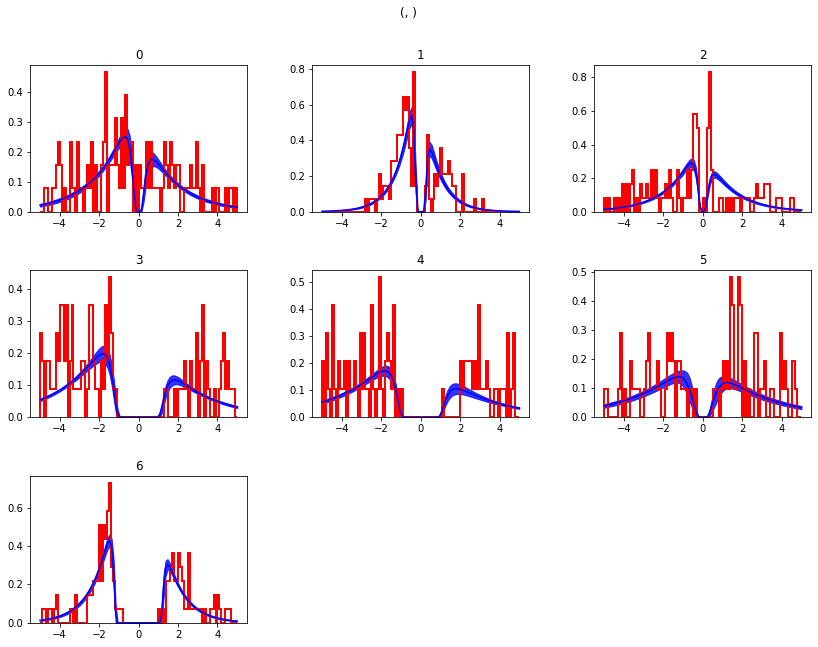

In [8]:
m.plot_posterior_predictive(figsize=(14, 10))

In [9]:
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

 [-----------------100%-----------------] 10000 of 10000 complete in 1030.5 sec

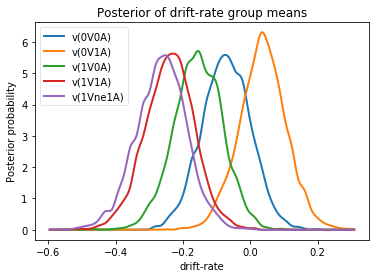

In [10]:
v_0V0A, v_0V1A, v_1V0A, v_1V1A, v_1Vne1A = m_stim.nodes_db.node[['v(0V0A)', 'v(0V1A)', 'v(1V0A)', 'v(1V1A)', 'v(1Vne1A)']]
hddm.analyze.plot_posterior_nodes([v_0V0A, v_0V1A, v_1V0A, v_1V1A, v_1Vne1A])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.savefig('hddm_demo_fig_06.pdf')

In [26]:
m_stim_a = hddm.HDDM(data, depends_on={'a': 'stim'})
m_stim_a.find_starting_values()
m_stim_a.sample(10000, burn=1000)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 10001 of 10000 complete in 1091.1 sec

Text(0.5, 1.0, 'Posterior of drift-rate group means')

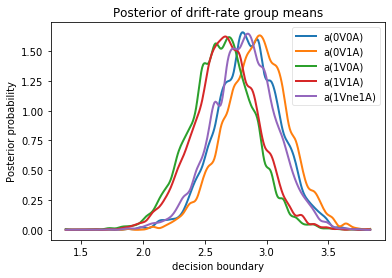

In [28]:
a_0V0A, a_0V1A, a_1V0A, a_1V1A, a_1Vne1A = m_stim_a.nodes_db.node[['a(0V0A)', 'a(0V1A)', 'a(1V0A)', 'a(1V1A)', 'a(1Vne1A)']]
hddm.analyze.plot_posterior_nodes([a_0V0A, a_0V1A, a_1V0A, a_1V1A, a_1Vne1A])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [11]:
print("P(0V0A > 0V1A) = ", (v_0V0A.trace() > v_0V1A.trace()).mean())
print("P(1V0A > 0V0A) = ", (v_1V0A.trace() > v_0V0A.trace()).mean())
print("P(1V1A > 0V0A) = ", (v_1V1A.trace() > v_0V0A.trace()).mean())
print("P(1Vne1A > 0V0A) = ", (v_1Vne1A.trace() > v_0V0A.trace()).mean())

P(0V0A > 0V1A) =  0.13822222222222222
P(1V0A > 0V0A) =  0.20822222222222223
P(1V1A > 0V0A) =  0.048
P(1Vne1A > 0V0A) =  0.035333333333333335


In [12]:
print("general model DIC: %f" % m.dic)
print("decision type model DIC: %f" % m_stim.dic)

general model DIC: 4724.074246
decision type model DIC: 4711.762639


Regression

In [22]:
from patsy import dmatrix
data.head(10)
dmatrix("C(stim, Treatment('0V0A'))", data.head(10))

DesignMatrix with shape (10, 1)
  Intercept
          1
          1
          1
          1
          1
          1
          1
          1
          1
          1
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('0V0A'))" (columns 1:1)

In [15]:
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('1V1A'))")

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('1V1A'))[T.0V0A]", "v_C(stim, Treatment('1V1A'))[T.0V1A]", "v_C(stim, Treatment('1V1A'))[T.1V0A]", "v_C(stim, Treatment('1V1A'))[T.1Vne1A]"]


In [16]:
m_within_subj.sample(5000, burn=200)

 [-----------------100%-----------------] 5000 of 5000 complete in 780.9 sec

/home/jasongong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


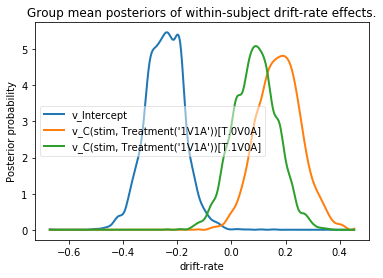

In [25]:
v_WL, v_LL, v_WW = m_within_subj.nodes_db.ix[["v_Intercept", 
                                              "v_C(stim, Treatment('1V1A'))[T.0V0A]", 
                                              "v_C(stim, Treatment('1V1A'))[T.1V0A]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')
plt.savefig('hddm_demo_fig_07.pdf')

In [ ]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5}, 
                                                   size=200, n_fast_outliers=10)

In [ ]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

In [ ]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
plt.savefig('hddm_demo_fig_10.pdf')

In [ ]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

In [ ]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
plt.savefig('hddm_demo_fig_11.pdf')